# AutoPilotTuiML testing funcs (local version)
The main goal of this notebook is only to debug and test fucntions from the package

In [1]:
import pandas as pd

import sys
  
    
sys.path.insert(0, '/Users/Tabe/Desktop/Projects/GitHub/autopilot/tuiautopilotml')

from wrappers import *
from autopilot_mode import *

In [2]:
path1 = '/Users/Tabe/Desktop/Projects/GitHub/autopilot/sample_data/travelers.csv'
path2 = '/Users/Tabe/Desktop/Projects/GitHub/autopilot/sample_data/trips.csv'
path3 = '/Users/Tabe/Desktop/Projects/GitHub/autopilot/sample_data/product_sales.csv'

In [3]:
travelers = pd.read_csv(path1, sep='\t' , engine = 'python' )
trips = pd.read_csv(path2, sep='\t' , engine = 'python' )
trips = trips.rename(columns={'traveler_id':'id'})
products = pd.read_csv(path3, sep='\t' , engine = 'python' )
trips_travelers = pd.merge(trips , travelers , how = 'left' , on = 'id' )
trips_travelers_p = pd.merge(trips_travelers ,products , how = 'left' , on = 'reservation_id' )
trips_travelers_p['bought_product'] =  trips_travelers_p['bought_product'].apply(lambda x: 1 if x == 1.0 else 0 )

In [4]:
trips_travelers_p.head()

,id,reservation_id,reservation_date,package_type,departure_date,departure_code,arrival_code,arrival_country,return_date,carrier_id,no_of_adults,no_of_kids,birthdate,gender_id,country_id,bought_product
0,8066822,3dae89e2133e2e6734c0eca07846ff2e57079ba7780005...,2017-09-04,STP,2017-09-14,OSL,SMI,Greece,2017-09-21,246,2,0,1963-10-04,3,2,0
1,7612471,33099e82865f00c713987276da184bee2e742757b05f80...,2017-01-25,STP,2017-06-16,GOT,AHO,Italy,2017-06-23,246,2,2,1980-02-02,3,1,1
2,6635207,19edda1fedb1a1e6777a055238febb7ecc64e87b60583e...,2018-08-16,STP,2018-09-09,ARN,HER,Greece,2018-09-16,246,2,1,1949-08-29,1,1,0
3,8668860,27798ab2976d9db73fefb47140a441af478c1fff10d26e...,2018-07-13,STP,2018-07-26,GOT,AYT,Turkey,2018-08-09,246,2,1,1960-03-10,1,1,0
4,6921503,d217195fd6a986fd7ead59ca9081d46f3de8e9a52779b5...,2017-09-29,STP,2017-10-17,ARN,CHQ,Greece,2017-10-24,246,2,1,1965-05-22,1,1,0


In [5]:
trips_travelers_p.isnull().sum()

id                   0
reservation_id       0
reservation_date     0
package_type         0
departure_date       0
departure_code       0
arrival_code         0
arrival_country      0
return_date          0
carrier_id           0
no_of_adults         0
no_of_kids           0
birthdate           80
gender_id            0
country_id           0
bought_product       0
dtype: int64

In [6]:
trips_travelers_p.dropna(axis=0, inplace =True)

## TESTING FUNCTIONS SET 1

In [6]:
# Init params 

# model = RandomForestRegressor()
# classification = False
# evaluation_metric = 'neg_mean_squared_error'
# dataframe = reg_df.copy()
# target_label = 'clicks'
# date_cols = ['departure_date'] 

model = RandomForestClassifier()
classification = True
evaluation_metric= 'accuracy'
#dataframe = clf_df
target_label = 'bought_product'

In [ ]:
#The following function is not is use

# Skip this function 

# print('Part 0')
# key_path = '/Users/carlosdelacruz/Desktop/main_folders/passwords_keys/keywords.txt'
# base = '/Users/carlosdelacruz/Desktop/main_folders/DSProjects/AutopilotProject/tuiautopilotml_notebooks/sql_files/'
# sql_file_location = base + 'needs_oct_dec.sql'
# extract_from_database_to_df(sql_file_location = sql_file_location, mode ='from_database', 
#                                  new_file_title ='traveller_features_oct_dec',
#                                  type_of_connection='snowflake', save_to_csv = True, 
#                                  sf_password_file_location=key_path, sf_user_name='CARLOS_DELACRUZ', 
#                                  sf_account='tuinordic.eu-central-1',sf_role='SYSADMIN')

print('Part 1')
transformed_df = dataframe_transformation(dataframe, cols_to_exclude=None,  drop_missing_values=False)                       
transformed_df_with_missing = dataframe_transformation(clf_df_with_missing, cols_to_exclude=None,  drop_missing_values=False)                       

t1 = shuffle_order_save(dataframe, shuffle=False, sample_size=100, save_sample_df=False )
t2 = shuffle_order_save(dataframe, shuffle=True, sample_size=100, save_sample_df=False )

print('Part 2')
n_estimators = [100, 200]
xgb_param_grid = dict( n_estimators=n_estimators )
func = get_cross_val_score_wrapper
func2 = grid_search_wrapper
model_training_estimator_wrapper(func= func2, dataframe= transformed_df[:700], split_pct_param=0.01, patience_limit=0.2, target_label = target_label, param_grid=xgb_param_grid ,model = model, 
                                 evaluation_metric="accuracy", n_jobs=-1, verbose = 3, n_folds=3, n_repeats=3,
                                 k_fold_method='stratified_k_fold', grid_search_method='randomized', random_state=seed)
                        

print('Part 3')


initial_eda_wrapper(dataframe=transformed_df, target_label = target_label, summary_report = False,
                         return_outliers = False , distribution = 'non_gaussian' , 
                     save_figures = False)

initial_eda_wrapper(dataframe=transformed_df, target_label = target_label, summary_report = False, 
                        return_outliers = True , distribution = 'non_gaussian' , 
                     save_figures = False)


Part 1
Converting columns to lowercase
Ran 3 checks on the dataframe
All the checks were passed..
Your dataframe seems to be correct. We return the original input data
Converting columns to lowercase
There are missing values in your dataset
Ran 3 checks on the dataframe
Sanity checks FAILED: (failures=1)
Converting to int float and dates
Column being processed: mosaic
Column being processed: avg_leadtime
Convert to float avg_leadtime
Column being processed: averageflightduration_imputedvalue
Convert to float averageflightduration_imputedvalue
Column being processed: averagepricepaid
Convert to float averagepricepaid
Column being processed: busyness
Convert to float busyness
Column being processed: basicholidaycostperpax_imputedvalue
Convert to float basicholidaycostperpax_imputedvalue
Column being processed: averagespendperactiveyear
Convert to float averagespendperactiveyear
Column being processed: pricesensitivity
Convert to float pricesensitivity
Column being processed: totalrevenue

## TESTING FUNCTIONS SET 2

In [ ]:
 print('Part 4')
X,y = get_splits_wrapper(dataframe = transformed_df, target_label =target_label , train_split=False, scaled=False, scaler=StandardScaler(),
                     validation_set=False , test_size = 0.2)


print('Part 5')
imputation_df = eval_imputation_method_wrapper(dataframe= transformed_df_with_missing, target_label= target_label, model=model, 
                                     classification=classification, evaluation_metric=evaluation_metric)


print('Part 6')
samp_df_encoded = get_encoded_wrapper(transformed_df) 

print(samp_df_encoded.shape)
samp_df_encoded2, map_ = get_encoded_wrapper(transformed_df, return_mapping =True) 
nulls_encoded,map_ = get_encoded_wrapper(transformed_df_with_missing, encode_nulls=True, return_mapping=True)


print('Part 7')
#OBS: XGBOOST WILL NOT RETURN VALUES WITH A SMALL DATASET , EX: 500
  
scalers_scores1, output_df1 = eval_model_scaler_wrapper(dataframe=samp_df_encoded[:1000], target_label=target_label, model_name='KNN', k_fold_method='k_fold', n_folds=3,
                             n_repeats=10,
                             classification=classification,
                             evaluation_metric=evaluation_metric)

print('Part 7.1')
scalers_scores2, output_df2= eval_model_scaler_wrapper(dataframe=samp_df_encoded[:1000], target_label=target_label, model_name='KNN', k_fold_method='repeated_k_fold', n_folds=3,
                             n_repeats=3,
                             classification=classification,
                             evaluation_metric=evaluation_metric)


print('Part 8')
outliers_scores1,outliers_df1 = handle_outliers(dataframe = samp_df_encoded[:1000], target_label=target_label, tot_outlier_pct=15, model= RandomForestClassifier(),
                         test_size=0.2)

outliers_scores2,outliers_df2  = handle_outliers(dataframe = samp_df_encoded[:1000],distribution=None, target_label=target_label, tot_outlier_pct=5, model= RandomForestClassifier(),
                         test_size=0.2)


print('Part 9')
feature_importance1 = get_feature_importance_wrapper(dataframe=samp_df_encoded , target_label=target_label ,method = 'rf' , classification = classification,
                                        n_features = 5 
                            , save_figure = False )

feature_importance2 = get_feature_importance_wrapper(dataframe=samp_df_encoded , target_label=target_label ,method = 'xgb' , classification = classification, n_features = 2 ,
                                  penalty = "l2" ,  save_figure = False )

print('Part 10')    

oversamplers1 = evaluate_oversamplers(dataframe=samp_df_encoded, target_label=target_label,classification=True, evaluation_metric='accuracy',  test_size=0.2, method='random_os', 
                      class_threshold=5,
                          model=model,random_state=0 )

oversamplers2 = evaluate_oversamplers(dataframe=samp_df_encoded, target_label=target_label, test_size=0.2, method='smote_os', 
                      class_threshold=5,model=model,random_state=0 )


Part 6
Label encode and one hot encode only objects


## TESTING FUNCTIONS SET 3 (train vs test)

In [ ]:
print('Part train vs test ')

train, test = train_test_split_from_df(dataframe, 0.2)
test_comp = TrainVsTest(train,test)
test_comp.get_report('Segment')
test_comp.get_train_test_distribution()
test_comp.get_train_test_counts()
a, b = test_comp.is_distribution_different()
full_data = test_comp.get_is_train_col()
test_comp.train_test_pairplot()
mean_score, std  = test_comp.get_covariance_shift_score(target_label = 'Segment')
cov_scores, drop_list = test_comp.get_covariance_shift_score_per_feature(cov_score_thresh=0.8)

Part train vs test 
Current folds: [0, 2000, 4000, 6000, 8000]
Label encode and one hot encode only objects
The process took: 0.02 minutes to run
Score for fold 0: [0.4860957850953448, 0.006786581004938409]
Label encode and one hot encode only objects
The process took: 0.02 minutes to run
Score for fold 1: [0.4927663669366858, 0.013370698625128914]
Label encode and one hot encode only objects
The process took: 0.02 minutes to run
Score for fold 2: [0.5056172095916173, 0.022639800438454837]
Label encode and one hot encode only objects
The process took: 0.02 minutes to run
Score for fold 3: [0.46903843571049153, 0.012984277164318402]
Mean score: 0.48837944933353483, Standard deviation: 0.01318782919107137
Current folds: [0, 2000, 4000, 6000, 8000]
Train shape(2000, 32)
Label encode and one hot encode only objects
Col:Mosaic
The process took: 0.02 minutes to run
Score for Mosaic in fold 0: [0.49672379054226035, 0.015717375552562345]
Col:Avg_LeadTime
The process took: 0.02 minutes to run
S

The process took: 0.02 minutes to run
Score for Frequency in fold 1: [0.5054091115825287, 0.02096775377395564]
Col:ActivePeriod
The process took: 0.03 minutes to run
Score for ActivePeriod in fold 1: [0.503380920586387, 0.012093555484924159]
Col:Household_income___Median_income
The process took: 0.03 minutes to run
Score for Household_income___Median_income in fold 1: [0.4759941051979205, 0.01211585165175024]
Col:Affluence
The process took: 0.03 minutes to run
Score for Affluence in fold 1: [0.47679191762425627, 0.014677841894299071]
Col:Urbanity___Generalised_urbanity_measure
The process took: 0.03 minutes to run
Score for Urbanity___Generalised_urbanity_measure in fold 1: [0.495721903841018, 0.007755649073666108]
Col:Rurality___Remoteness_from_high_streets
The process took: 0.02 minutes to run
Score for Rurality___Remoteness_from_high_streets in fold 1: [0.4916254857808779, 0.012844510756118456]
Col:Sum_IsWeb
The process took: 0.02 minutes to run
Score for Sum_IsWeb in fold 1: [0.495

The process took: 0.03 minutes to run
Score for BoardBasisOffersDescription.Half.Board in fold 2: [0.4926968715925117, 0.004584303422580939]
Col:Months
The process took: 0.03 minutes to run
Score for Months in fold 2: [0.4743523883768316, 0.011831425159826024]
Col:Segment
The process took: 0.03 minutes to run
Score for Segment in fold 2: [0.5008484939932191, 0.019470049653943965]
Train shape(2000, 32)
Label encode and one hot encode only objects
Col:Mosaic
The process took: 0.02 minutes to run
Score for Mosaic in fold 3: [0.47066068273162626, 0.011780649762893293]
Col:Avg_LeadTime
The process took: 0.03 minutes to run
Score for Avg_LeadTime in fold 3: [0.502976844434671, 0.022988802906357235]
Col:AverageFlightDuration_ImputedValue
The process took: 0.03 minutes to run
Score for AverageFlightDuration_ImputedValue in fold 3: [0.4884657415487933, 0.01547462301303252]
Col:AveragePricePaid
The process took: 0.03 minutes to run
Score for AveragePricePaid in fold 3: [0.5054022038287213, 0.008

KeyboardInterrupt: 

## TESTING FUNCTIONS SET 3.1

In [ ]:
print('Part 13')

multi_scores_df = evaluate_models_wrapper(dataframe=samp_df_encoded[:1000], target_label='segment', models_list=models_list_default, classification=True, multiple_eval_scores=True, stacking=True)

evaluate_models_wrapper(dataframe=samp_df_encoded[:1000], target_label='segment', models_list=models_list_default, classification=True, multiple_eval_scores=False, stacking=True)


print('Part 13.1 Reduced features score')

scores_redcued_features = get_reduced_features_cv_scores(samp_df_encoded, target_label, model)


print('Part 14')

n_estimators = [100, 200, 300, 400, 500]

xgb_param_grid = dict(n_estimators=n_estimators)
            

X_scaled,y = get_splits_wrapper(dataframe = samp_df_encoded, target_label =target_label , train_split=False, scaled=True, scaler=StandardScaler(),
                      validation_set=False , test_size = 0.2)

output_grid_s = grid_search_wrapper(dataframe=samp_df_encoded , target_label = target_label,model= model, param_grid = xgb_param_grid, 
                             evaluation_metric=evaluation_metric, n_jobs=-1, verbose = 3, n_folds=3, n_repeats=3,
                        k_fold_method='stratified_k_fold', grid_search_method='randomized', random_state= seed)

print('Part 15')   
results_list = hyper_opt_manual(dataframe= samp_df_encoded[:1000], target_label= target_label, model_name='XGB', max_evals=80, k_fold_method='k_fold', n_folds=3,
                    n_repeats=2, classification=True, evaluation_metric='accuracy', timeout_minutes=0.5, n_jobs=-1,
                    verbose=0)

print('Part 15.1')  
func = hyper_opt_manual

ml_flow_wrapper(func=func,model_name='test_model_name', evaluation_metric = 'accuracy',dataframe= samp_df_encoded[:1000], target_label= target_label, model_name='XGB', max_evals=80, k_fold_method='k_fold', n_folds=3,
                    n_repeats=2, classification=True, evaluation_metric='accuracy', timeout_minutes=0.5, n_jobs=-1,
                    verbose=0)

Part 15
Model name: XGB, Parameters: {'n_estimators': <hyperopt.pyll.base.Apply object at 0x7f8b080a1c50>, 'max_depth': <hyperopt.pyll.base.Apply object at 0x7f8b080a1f90>, 'min_child_weight': <hyperopt.pyll.base.Apply object at 0x7f8b080a91d0>, 'gamma': <hyperopt.pyll.base.Apply object at 0x7f8b080a9490>}
[07:47:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:47:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:47:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

## TESTING FUNCTIONS SET 4 (functions are not updated)

In [ ]:
# # RUN THIS CODE FIRST 

# def mlp_hyperopt_wrapper(X_train, X_valid, y_train, y_valid, X_test, y_test, activation_f_type='multiclass' ,classification=True, 
#                          metrics ='accuracy',monitor='val_loss', mode='min',hl_activation='relu',verbose=3, 
#                          patience=3,max_evals=100 , timeout_minutes=10):
    
#     if y_train.nunique() != y_valid.nunique():
#         print(f' y_train and y _valid should have the same size')

#     if activation_f_type == 'classif':
#         o_activation = 'sigmoid'
#         loss = 'binary_crossentropy'

#     elif activation_f_type == 'multiclass':
#         o_activation = 'softmax'
#         loss = 'categorical_crossentropy'

#     elif activation_f_type == 'reg':
#         o_activation = 'linear'  # relu 
#         loss = 'mean_squared_error'

#     timeout = timeout_minutes * 60
#     space = get_initial_dicts(mode='hyperparams', params_list='MLP', classification=classification)['MLP']


#     def hyperparameters(space):
#         input_n = space['input_n']
#         output_n = int(y_train.nunique())
#         n_neurons = int(np.sqrt(input_n * output_n)* input_n)
#         print(input_n)
#         print(n_neurons)
#         print(space)

#         model = Sequential()

#         #model.add(Dense(units=space['units1'], input_dim=X_train.shape[1], activation=hl_activation))  # input layer
#         model.add(Dense(units=n_neurons/2.5, input_dim=X_train.shape[1], activation=hl_activation))  # input layer

#         model.add(Dropout(space['dropout1']))

#         #model.add(Dense(units=space['units2'], activation=hl_activation))
#         model.add(Dense(units=n_neurons/5.5, input_dim=X_train.shape[1], activation=hl_activation))  # input layer

#         model.add(Dropout(space['dropout2']))

#         model.add(Dense(int(y_train.nunique()), activation=o_activation))  # output layer

#         model.compile(loss= loss, optimizer=space['optimizer'], metrics=[metrics])
#         early_stop = EarlyStopping(monitor=monitor, mode=mode, verbose=verbose, patience=patience)

#         print('Fit model...')
#         # transform y 
#         y_train_cat = tf.keras.utils.to_categorical(y_train)
#         y_valid_cat = tf.keras.utils.to_categorical(y_valid)

#         model.fit(X_train, y_train_cat, epochs=space['epochs'], verbose=verbose, callbacks=[early_stop],
#                   batch_size=space['batch_size'], validation_data=(X_valid, y_valid_cat))

#         print('Predict...')
#         prediction = model.predict(X_test, batch_size=space['batch_size'], verbose=verbose)
#         prediction = np.argmax(prediction, axis=1)
#         score = accuracy_score(y_test, prediction)
#         print('Accuracy:', score)

#         return {'loss': -score, 'status': STATUS_OK, 'model': model}

#     trials = Trials()

#     best = fmin(fn=hyperparameters,
#                 space=space,
#                 algo=tpe.suggest,
#                 max_evals=max_evals,
#                 trials=trials,
#                 timeout=timeout
#                 )
#     print('optimization complete')
#     best_model = trials.results[np.argmin([r['loss'] for r in
#                                            trials.results])]

#     best_score = best_model['loss'] * -1 
#     #params = best_model['model'].get_params()#[algorithm]

#     return best_score,trials


# def mlp_basemodel_wrapper(X_train, X_valid, y_train, y_valid, activation_f_type = 'classif' , optimizer = 'adam' ,
#                           regulator = 10,
#                           hl_activation = 'relu', epochs = 100 , batch_size = 128 ,metrics = 'accuracy',
#                           metric_to_monitor = 'val_loss', mode = 'minimize', patience = 10, verbose = 1  ):
#     """
#     MLP for baseline model creation 
#     """
#     print(f'Numeber of features: {X_train.shape[1]}')

#     input_n = X_train.shape[1]
#     output_n = int(y_train.nunique())
    
#     if activation_f_type == 'classif':
#         o_activation = 'sigmoid'
#         loss='binary_crossentropy'
    
#     elif  activation_f_type == 'multiclass':
#         o_activation = 'softmax'
#         loss='categorical_crossentropy'
    
#     elif  activation_f_type == 'reg':
#         o_activation = 'linear'# relu 
#         loss='mean_squared_error'
    
#     print(f'Activation function used for output layer: {o_activation}')
    
#     n_neurons = int(np.sqrt(input_n * output_n)* regulator)
#     print(f'Number of neurons: {n_neurons}-{int(n_neurons/2.5)}-{int(n_neurons/5.5)}')

#     model = Sequential()
#     model.add(Dense(n_neurons, input_dim = input_n, activation= hl_activation))# input layer 

#     model.add(Dropout(0.3))
    
#     model.add(Dense(int(n_neurons/2.5), activation= hl_activation))
#     model.add(Dropout(0.3))
    
#     model.add(Dense(int(n_neurons/5.5) , activation=hl_activation))
#     model.add(Dropout(0.1))
    
#     model.add(Dense(output_n, activation= o_activation))# output layer 
    
    
#     model.compile(loss=loss, optimizer = optimizer, metrics=[metrics])
#     early_stop = EarlyStopping(monitor = metric_to_monitor, mode = mode, verbose = verbose, patience = patience)
#     print('Fit model...')
    
#     print(f'converting y{y_train.shape}')
#     y_valid = tf.keras.utils.to_categorical(y_valid)
#     y_train = tf.keras.utils.to_categorical(y_train)
    
#     print(f'converted y{y_train.shape}')
#     model.fit(X_train, y_train, epochs = epochs , verbose = verbose , callbacks=[early_stop] , 
#               batch_size = batch_size , validation_data= (X_valid,y_valid ) )
    
#     return model


In [ ]:
# print('Part 16') 
# X_train, X_valid, y_train, y_valid , X_test, y_test = get_splits_wrapper(dataframe = samp_df_encoded,
#                                                                          target_label = target_label, train_split=True
#                        ,validation_set=True , test_size = 0.2 , scaled=True , scaler= MinMaxScaler())

# best_score, trials = mlp_hyperopt_wrapper(X_train, X_valid, y_train, y_valid , X_test, y_test ,hl_activation='relu', 
#                      activation_f_type='classif', patience= 1 ,max_evals =100, timeout_minutes = 2,
#                                           monitor='val_accuracy', mode='max', )


# print('Part 17')   
# X, y  = get_splits_wrapper(dataframe = samp_df_encoded, target_label = 'segment', train_split=False
#                       ,validation_set=False , test_size = 0.2 , scaled=True , scaler= MinMaxScaler())

# best_params, best_score, study = optuna_wrapper(dataframe=samp_df_encoded,target_label=target_label,algorithm='XGB', 
#                                   params_list= ['n_estimators' ,'max_depth' , 'learning_rate'],
#        n_minutes_limit= 1 , n_trials = 15  )


# print('Part 18')   
# neural_net_model = mlp_basemodel_wrapper(X_train, X_valid, y_train, y_valid, optimizer = 'adam' , 
#                                          hl_activation = 'relu', activation_f_type='multiclass' ,
#                                          epochs = 200 , batch_size = 128, patience = 10, regulator= 100 )

# TESTING FUNCTIONS SECTION
This sections does not have any particular structure. Its main goal is to use it to test functions in different orders

## AUTOPILOT FUCNTIONS
This section tests all functions related to the autopilot mode

In [176]:

# a,b = evaluate_oversamplers(dataframe=CONFIG_LOCAL['dataframe'], target_label=CONFIG_LOCAL['target_label'],classification=True, evaluation_metric='accuracy',  test_size=0.2, 
#                       class_threshold=5,
#                           model=RandomForestClassifier(), random_state=0 )


In [177]:

# imputation_df = eval_imputation_method_wrapper(dataframe= CONFIG_LOCAL['dataframe'], target_label= target_label, model=RandomForestClassifier(), 
#                                      classification=classification, evaluation_metric=evaluation_metric)


In [178]:


# a,b = handle_outliers(dataframe = get_encoded_wrapper(CONFIG_LOCAL['dataframe'].dropna()), target_label=target_label, tot_outlier_pct=15, model= RandomForestClassifier(),
#                          test_size=0.2)



In [179]:


# trans1 = dataframe_transformation(CONFIG_LOCAL['dataframe'])
# scores, output_df = eval_model_scaler_wrapper(get_encoded_wrapper(trans1.dropna()),
#                                               CONFIG_LOCAL['target_label'], CONFIG_LOCAL['model_name'],
#                                               k_fold_method='k_fold', n_folds=5,
#                                               n_repeats=10, classification=True, evaluation_metric='accuracy')

In [6]:




# samp_df = get_encoded_wrapper(trips_travelers_p[:3000].dropna())

# scores, best_model = evaluate_models_wrapper(dataframe=samp_df, target_label=target_label,
#                                              models_list=models_list_default, classification=classification,
#                                              multiple_eval_scores=False, stacking=True)


In [ ]:
# # Tasks load params of best model 

# def hyper_opt_manual(dataframe: pd.DataFrame, target_label: str, model_name=None, max_evals=80, k_fold_method='k_fold',
#                      n_folds=3, n_repeats=2, classification=True, evaluation_metric='accuracy', timeout_minutes=10,
#                      n_jobs=-1, verbose=0):
#     """

#     Args:
#         model_name:
#         dataframe:
#         target_label:
#         max_evals:
#         k_fold_method:
#         n_folds:
#         n_repeats:
#         classification:
#         evaluation_metric:
#         timeout_minutes:
#         n_jobs:
#         verbose:

#     Returns:

#     """

#     timeout = timeout_minutes * 60
#     models_dict = models['clf'] if classification else models['reg']
#     current_model_dict = select_custom_dict(models_dict, model_name)

#     hyper_params_dict = hyper_params['clf'] if classification else hyper_params['reg']
#     space = select_custom_dict(hyper_params_dict, model_name)[model_name]
#     print(f'Model name: {model_name}, Parameters: {space}')

#     scores = {}

#     def objective(selected_space):
#         # clone the current version of the model in order to avoid overwriting the dictionary
#         model_base = clone(current_model_dict[model_name])

#         model_base.set_params(**selected_space)

#         score = get_cross_val_score_wrapper(dataframe=dataframe, target_label=target_label, model=model_base,
#                                             classification=classification, evaluation_metric=evaluation_metric,
#                                             k_fold_method=k_fold_method,
#                                             n_folds=n_folds,
#                                             n_repeats=n_repeats, n_jobs=-n_jobs, verbose=verbose)
#         scores[model_name] = score[0]

#         print(f'Accuracy: {score[0]}')

#         # We aim to maximize accuracy, therefore we return it as a negative value
#         return {'loss': - score[0], 'std': score[1], 'status': STATUS_OK, 'model': model_base}

#     trials = Trials()

#     fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=max_evals, trials=trials,
#          timeout=timeout)  # early_stop_fn = no_progress_loss(10)

#     print('optimization complete')
#     best_model = trials.results[np.argmin([r['loss'] for r in
#                                            trials.results])]

#     best_score = best_model['loss'] * -1
#     std = best_model['std']

#     params = {k: v for k, v in best_model['model'].get_params().items() if v is not None}

#     results = {model_name: (best_score, std)}

#     print(f'Results:{results}')

#     return results, params


## Autopilot mode testing
This section is only dedicated to the autopilot mode

In [7]:
# auto generated nulls

for i in range(0,len(trips_travelers_p),10):
    trips_travelers_p['no_of_kids'].replace(i,np.nan, inplace=True)
    
trips_travelers_p.drop(['reservation_date','departure_date'],axis=1, inplace=True )

In [8]:
# IDEA: break this down into several dictionaries and combine into 1 

CONFIG_LOCAL = {
    'run_id_number': np.random.randint(1,100), 
    'dataframe': trips_travelers_p[:3000],#dataframe[:3000],
    #'latest_df': pd.DataFrame(),
    'cols_to_exclude': ['id', 'reservation_id', 'return_date', 'birthdate'], 
    'drop_missing_values': False,
    'baseline_model_name': 'baseline_model_score',
    'target_label': 'bought_product',
    'scaled_df': True,
    'models_list': models_list_default, # 
    #'model': RandomForestClassifier(random_state = seed),
    'model_name': 'RF',
    'scaler': scalers['Standard'],
    'multi_classif': False,
    'stacking': False,
    'distribution': 'non_gaussian',
    'tot_outlier_pct': 13,
    'classification': True,
    'evaluation_metric': 'accuracy',
    'multiple_eval_scores': False,
    'test_size': 0.2,
    'k_fold_method': 'k_fold',
    'n_folds': 5,
    'n_repeats': 10,
    'seed': 0,
    'n_jobs': -1,
    'verbose': 0,
    'max_evals': 80,
    'timeout_minutes': 2, 
    'n_minutes_limit':0.5,
    'class_threshold': 5, 
    'params_list':['n_estimators' ,'max_depth' , 'learning_rate']
}

Current run_id: 49
*********JOB:0: dataframe_transformation*********
Dropping cols to exclude
Converting columns to lowercase
There are missing values in your dataset
Ran 3 checks on the dataframe
Sanity checks FAILED: (failures=1)
Converting to int float and dates
Updating config dataframe_transformation...
*********JOB:1: handle_missing_values*********
Training fold: 0
Columns with missing values: ['no_of_kids']
Running strategy median
Label encode and one hot encode only objects
Columns with missing values: ['no_of_kids']
Running strategy median
Label encode and one hot encode only objects
Custom cv scores:[0.71]
Training fold: 1
Columns with missing values: ['no_of_kids']
Running strategy median
Label encode and one hot encode only objects
Columns with missing values: ['no_of_kids']
Running strategy median
Label encode and one hot encode only objects
Custom cv scores:[0.71, 0.6366666666666667]
Training fold: 2
Columns with missing values: ['no_of_kids']
Running strategy median
Labe

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


The process took: 0.06 minutes to run
Logging sklearn artifacts...
Find your results here: http://localhost:5000/
Score: 0.6460237989095023 Std:0.026695620030016288
*********JOB:4: handle_outliers*********
Mixed function
Replace values
mean
Training fold: 0
Custom cv scores:[0.6431535269709544]
Training fold: 1
Custom cv scores:[0.6431535269709544, 0.6556016597510373]
Training fold: 2
Custom cv scores:[0.6431535269709544, 0.6556016597510373, 0.6182572614107884]
Training fold: 3
Custom cv scores:[0.6431535269709544, 0.6556016597510373, 0.6182572614107884, 0.5892116182572614]
Training fold: 4
Custom cv scores:[0.6431535269709544, 0.6556016597510373, 0.6182572614107884, 0.5892116182572614, 0.6390041493775933]
median
Training fold: 0
Custom cv scores:[0.6348547717842323]
Training fold: 1
Custom cv scores:[0.6348547717842323, 0.6597510373443983]
Training fold: 2
Custom cv scores:[0.6348547717842323, 0.6597510373443983, 0.6597510373443983]
Training fold: 3
Custom cv scores:[0.634854771784232

/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={1: 415} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={1: 415} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


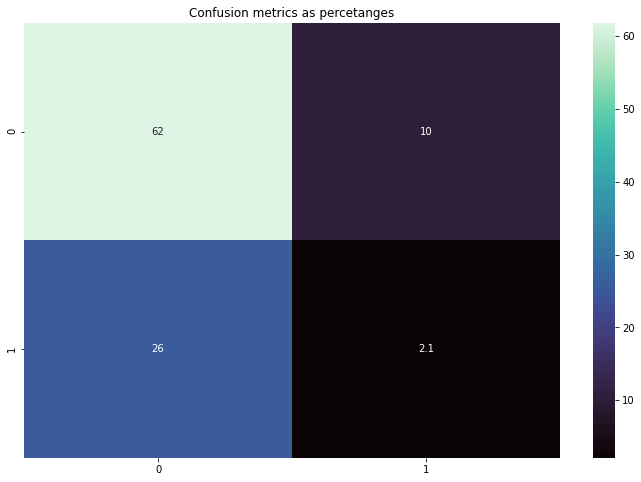

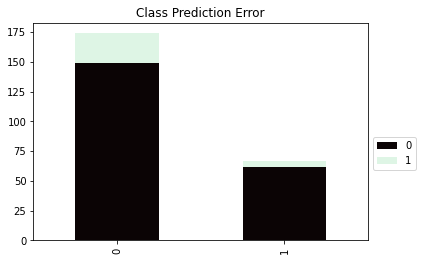

PART 5: Make the prediction. Evaluate only on test data
Kappa score: -0.006354393609295572
PART 6: Plot


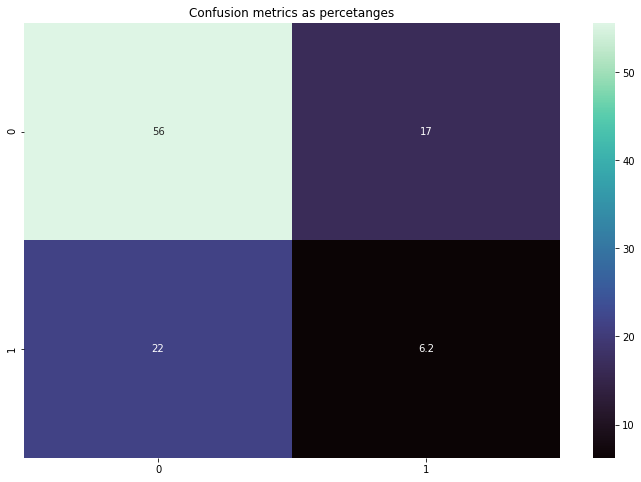

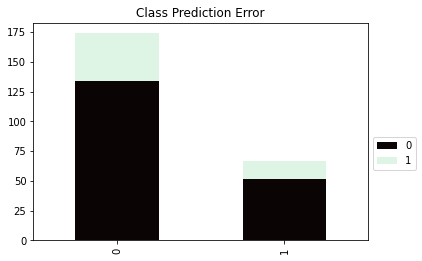

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       174
           1       0.27      0.22      0.25        67

    accuracy                           0.62       241
   macro avg       0.50      0.50      0.50       241
weighted avg       0.60      0.62      0.61       241

Current scores: {'smote_os': [0.6074380165289256, None], 'random_os': [0.6182572614107884, None]}
***********Generating final output***********
Current best method: random_os
Params to return:{}
returning params_excluded_dict
Generating internal x,y
The process took: 0.01 minutes to run
y counts:{0: 73.20099255583126, 1: 26.799007444168733}
Classes to re sample: [1]
Current percentile value 520
Previous scores: (0.6501457426014197, 0.016005301124744076)
New scores: (0.6182572614107884, None)
We keep previous results since the new results are not significant
*********JOB:6: evaluate_models*********
Scoring function


/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={1: 520} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={1: 520} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The process took: 0.0 minutes to run
Score for KNN: [0.6509790473577723, 0.03243112694891631]
The process took: 0.0 minutes to run
Score for NB: [0.7254003634991941, 0.01810480769741955]
The process took: 0.0 minutes to run
Score for SVC: [0.7279071362436131, 0.028043749301388147]
The process took: 0.01 minutes to run
Score for RF: [0.6435238846404444, 0.018971842095622925]
The process took: 0.02 minutes to run
Score for XGB: [0.6716504920956071, 0.026741394642166023]
The process took: 0.01 minutes to run
Score for ADA: [0.7312094921298995, 0.0238283624621461]
The process took: 0.06 minutes to run
Score for MLP: [0.7121737937656458, 0.023285911665417432]
Generating graph


/Users/Tabe/Desktop/Projects/GitHub/autopilot/tuiautopilotml/helper_functions.py:634: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(keys)


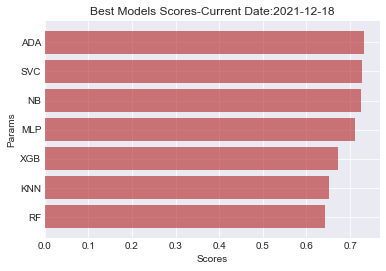

Saving figure/table to disk...
Final scores: {'KNN': [0.6509790473577723, 0.03243112694891631], 'NB': [0.7254003634991941, 0.01810480769741955], 'SVC': [0.7279071362436131, 0.028043749301388147], 'RF': [0.6435238846404444, 0.018971842095622925], 'XGB': [0.6716504920956071, 0.026741394642166023], 'ADA': [0.7312094921298995, 0.0238283624621461], 'MLP': [0.7121737937656458, 0.023285911665417432]}
Previous scores: (0.6501457426014197, 0.016005301124744076)
New scores: (0.7312094921298995, 0.0238283624621461)
Results are significant, updating config and uploading from config file...
Logging SK-LEARN artifacts...
Uploading config to MLFLOW...
Find your results here: http://localhost:5000/
*********JOB:7: transformation_methods*********
Mixed function
Processing scaler: MinMax
The process took: 0.01 minutes to run
Processing transformer: KBins


/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:188: UserWarning: Feature 4 is constant and will be replaced with 0.
  "replaced with 0." % jj)
/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:188: UserWarning: Feature 5 is constant and will be replaced with 0.
  "replaced with 0." % jj)


The process took: 0.01 minutes to run
Processing transformer: PCA
You got error:Shape of passed values is (1209, 8), indices imply (1209, 10) Transformer PCA does not work with this dataframe
Processing transformer: Truncated
You got error:Shape of passed values is (1209, 4), indices imply (1209, 10) Transformer Truncated does not work with this dataframe
Processing transformer: PowerTransformer


/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


The process took: 0.01 minutes to run
Processing transformer: Quantile
The process took: 0.01 minutes to run
Processing scaler: Standard
The process took: 0.01 minutes to run
Processing transformer: KBins


/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:188: UserWarning: Feature 4 is constant and will be replaced with 0.
  "replaced with 0." % jj)
/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:188: UserWarning: Feature 5 is constant and will be replaced with 0.
  "replaced with 0." % jj)


The process took: 0.01 minutes to run
Processing transformer: PCA
You got error:Shape of passed values is (1209, 8), indices imply (1209, 10) Transformer PCA does not work with this dataframe
Processing transformer: Truncated
You got error:Shape of passed values is (1209, 4), indices imply (1209, 10) Transformer Truncated does not work with this dataframe
Processing transformer: PowerTransformer


/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


The process took: 0.01 minutes to run
Processing transformer: Quantile
The process took: 0.01 minutes to run
Current scores:{'scale_x-None-MinMax-False': (0.7312094921298995, 0.0238283624621461), 'scale_x-KBins-MinMax-True': (0.7320393676485717, 0.02498230835609432), 'scale_x-PowerTransformer-MinMax-True': (0.7320393676485717, 0.02498230835609432), 'scale_x-Quantile-MinMax-True': (0.7312094921298995, 0.0238283624621461), 'scale_x-None-Standard-False': (0.7312094921298995, 0.0238283624621461), 'scale_x-KBins-Standard-True': (0.7320393676485717, 0.02498230835609432), 'scale_x-PowerTransformer-Standard-True': (0.7320393676485717, 0.02498230835609432), 'scale_x-Quantile-Standard-True': (0.7312094921298995, 0.0238283624621461)}
***********Generating final output***********
Current best method: scale_x-KBins-MinMax-True
Params to return:{'transformer_name': 'KBins', 'scaler_name': 'MinMax', 'use_transformers': True}
returning combination dict
Previous scores: (0.7312094921298995, 0.023828362

/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:188: UserWarning: Feature 4 is constant and will be replaced with 0.
  "replaced with 0." % jj)
/Users/Tabe/opt/miniconda3/envs/hyperl_env/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:188: UserWarning: Feature 5 is constant and will be replaced with 0.
  "replaced with 0." % jj)


The process took: 0.28 minutes to run                 
Accuracy: 0.7295531703302356                          
The process took: 0.26 minutes to run                                            
Accuracy: 0.7295531703302356                                                     
The process took: 0.07 minutes to run                                            
Accuracy: 0.7312094921298995                                                     
The process took: 0.08 minutes to run                                            
Accuracy: 0.7312094921298995                                                     
The process took: 0.13 minutes to run                                            
Accuracy: 0.7303830458489078                                                     
The process took: 0.16 minutes to run                                            
Accuracy: 0.7303830458489078                                                     
The process took: 0.29 minutes to run                                 

In [9]:
##### 'WORK IN PROGRESS' #####
    
default_steps = {'dataframe_transformation': dataframe_transformation,
                'handle_missing_values': eval_imputation_method_wrapper, 
                 'encoding': get_encoded_wrapper,
                 'baseline_score': get_baseline_score 
                 } 

modelling_steps = {'handle_outliers': handle_outliers, 'evaluate_oversamplers':evaluate_oversamplers, 'evaluate_models': evaluate_models_wrapper} 

post_modelling_steps = {'transformation_methods': eval_model_scaler_wrapper,'grid_search':grid_search_wrapper, 'hyper_param_opt': hyper_opt_manual,'optuna':optuna_wrapper} 

pipe_steps = {**default_steps, **modelling_steps, ** post_modelling_steps }  

autopilot_mode(steps=pipe_steps , config_dict = CONFIG_LOCAL )

# ************Apendix code************
This section of the notebook contains experimental approaches 

In [ ]:
def get_cols_cardinality(dataframe,n_max_categories):

    cols = [cname for cname in dataframe if dataframe[cname].nunique() <= n_max_categories and
                            dataframe[cname].dtype == "object"]
    return cols


class Figures:

    def __init__(self, input_data, target_label, asc=False, fig_title=f'Fig Title',
                 x_title='X_axis_title', y_title='Y_axis_title', stage='current stage'):
        """Avalable stages: Exploratory Data Analysis ,Feature Engineering """
        self.input_data = input_data
        self.target_label = target_label
        self.asc = asc
        self.fig_title = fig_title
        self.x_title = x_title
        self.y_title = y_title
        self.stage = stage
     
  
class OtherPLots(Figures):
#     def __init__(self):
#         pass

    def correlation_heatmap(self,figsize=(12, 7) ,palette=None , save_figure=False):
        print('Correlation between variables')
        plt.figure(figsize=figsize)
        sns.heatmap(self.input_data.corr(), cmap=palette, fmt='g', annot=False)
        if save_figure:
            save_figure_to_disk(main_folder=self.stage, figure_name= self.fig_title , save_as_plt = True)
        plt.show()

    def combination_plot(self,palette=None,save_figure=False ):
        train, test = train_test_split_from_df(dataframe,test_size)

        int_float_cols = self.input_data.select_dtypes([int, float]).columns
        plt.figure(figsize=(10, (len(int_float_cols)) * 2 + 3))  # width , height

        count = 1
        for col in int_float_cols:
            # Row 2
            plt.subplot(len(int_float_cols), 2, count)  # n_rows , n columns , index
            sns.boxplot(x=col, y=self.target_label, data=self.input_data, palette=palette)
            count += 1

            # Row 2
            plt.subplot(len(int_float_cols), 2, count)
            g = sns.kdeplot(self.input_data[col], palette=palette, alpha=0.6, shade=True)
            g.set_xlabel(col)
            # g.set_ylabel("Frequency")
            # g = g.legend(["No Diesese", "Diesese"])
            count += 1

        plt.tight_layout()
        if save_figure:
            save_figure_to_disk(main_folder=self.stage, figure_name= self.fig_title , save_as_plt = True)
        
        plt.show()


In [ ]:
class BarPlots(Figures):
    
    def order_keys_values(self):

        if type(self.input_data) == dict:
            self.input_data = dict(sorted(self.input_data.items(), key=lambda x: (x[1], x[0]), reverse=self.asc))
            keys = list(self.input_data.keys())
            values = list(self.input_data.values())
            return keys, values

        elif type(self.input_data) == pd.core.frame.DataFrame:
            keys = list(self.input_data.index)
            values = list(self.input_data.importance)
            return keys, values
    
    def horizontal_barplot(self, figsize=(12, 7), color='firebrick',save_figure=False):

        keys, values = self.order_keys_values()

        fig, ax = plt.subplots(figsize=figsize)
        ax.barh(y=keys, width=values, align='center', color=color, alpha=0.6)
        ax.set_yticklabels(keys)
        ax.invert_yaxis()
        ax.set_xlabel(self.y_title)
        ax.set_ylabel(self.x_title)
        ax.set_title(self.fig_title)
        if save_figure:
            save_figure_to_disk(main_folder=self.stage, figure_name= self.fig_title , save_as_plt = True)
        plt.show()


    def vertical_barplot(self, figsize=(12, 7), color='firebrick',save_figure=False):

        keys, values = self.order_keys_values()

        plt.figure(figsize=figsize)
        plt.bar(x=keys, height=values, color=color, width=0.4, alpha=0.6)

        plt.title(self.fig_title)
        plt.xlabel(self.x_title)
        plt.ylabel(self.y_title)
        
        if save_figure:
            save_figure_to_disk(main_folder=self.stage, figure_name= self.fig_title , save_as_plt = True)
        plt.show()

    def count_plots(self, cols = list, palette=None, figsize=(14, 48), save_figure=False ):
        cols = cols if type(cols) is list else [cols]
        plt.figure(figsize=figsize)
        count = 1
        
        for col in cols:
            count += 1
            plt.subplot(9, 2, count)
            sns.countplot(y=col, data=self.input_data, alpha=0.6, order=self.input_data[col].value_counts().index, palette=palette)
            count += 1
            
        if save_figure:
            save_figure_to_disk(main_folder=self.stage, figure_name= self.fig_title , save_as_plt = True)

        plt.show()
        
d = {'a':435454,'b':93849834,'c':93849834}
#         self.input_data = input_data
#         self.target_label = target_label
#         self.asc = asc
#         self.fig_title = fig_title
#         self.x_title = x_title
#         self.y_title = y_title
#         self.stage = stage
     
b = BarPlots(scores ,target_label=target_label, fig_title='barplot',stage= 'Exploratory Data Analysis')

## get_probabilities_per_category

In [ ]:
# UPDATE THIS WITH NEW VERSION 

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[CV] END  accuracy: (test=0.293) f1_score: (test=0.246) precision_score: (test=0.272) recall_score: (test=0.246) total time=   0.0s
[CV] END  accuracy: (test=0.590) f1_score: (test=0.408) precision_score: (test=0.428) recall_score: (test=0.403) total time=   0.8s
[CV] END  accuracy: (test=0.473) f1_score: (test=0.303) precision_score: (test=0.328) recall_score: (test=0.334) total time=   0.5s
[CV] END  accuracy: (test=0.498) f1_score: (test=0.355) precision_score: (test=0.372) recall_score: (test=0.357) total time=   2.9s
[16:21:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[CV] END  accuracy: (test=0.407) f1_score: (test=0.240) precision_score: (test=0.257) recall_score: (test=0.237) total time=   0.1s
[CV] END  accuracy: (test=0.363) f1_score: (test=0.291) precision_score: (test=0.304) recall_score: (test=0.315) total time=   0.0s
[CV] END  accuracy: (test=0.526) f1_score: (test=0.309) precision_score: (test=0.344) recall_score: (test=0.302) total time=   0.2s
[CV] END  accuracy: (test=0.616) f1_score: (test=0.428) precision_score: (test=0.476) recall_score: (test=0.415) total time=   0.8s
[16:21:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END  accuracy: (test=0.625) f1_score: (test=0.440) precision_score: (test=0.459) recall_score: (test=0.430) total time=   4.3s
[CV] END  accuracy: (test=0.524) f1_score: (test=0.363) p

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[CV] END  accuracy: (test=0.393) f1_score: (test=0.240) precision_score: (test=0.268) recall_score: (test=0.245) total time=   0.1s
[CV] END  accuracy: (test=0.491) f1_score: (test=0.298) precision_score: (test=0.301) recall_score: (test=0.305) total time=   0.2s
[CV] END  accuracy: (test=0.628) f1_score: (test=0.430) precision_score: (test=0.478) recall_score: (test=0.416) total time=   0.8s
[16:21:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END  accuracy: (test=0.634) f1_score: (test=0.449) precision_score: (test=0.460) recall_score: (test=0.441) total time=   5.1s
[CV] END  accuracy: (test=0.471) f1_score: (test=0.196) precision_score: (test=0.202) recall_score: (test=0.215) total time=   0.5s
[16:21:31] WARNING: /Users/travis/build/dmlc/xgboost/src/

##  Learning to Rank

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 7).split(df, groups=df['id'])

X_train_inds, X_test_inds = next(gss)

train_data= df.iloc[X_train_inds]
X_train = train_data.loc[:, ~train_data.columns.isin(['id','rank'])]
y_train = train_data.loc[:, train_data.columns.isin(['rank'])]

test_data= df.iloc[X_test_inds]

#We need to keep the id for later predictions
X_test = test_data.loc[:, ~test_data.columns.isin(['rank'])]
y_test = test_data.loc[:, test_data.columns.isin(['rank'])]

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 7).split(df, groups=df['id'])

X_train_inds, X_test_inds = next(gss)

train_data= df.iloc[X_train_inds]
X_train = train_data.loc[:, ~train_data.columns.isin(['id','rank'])]
y_train = train_data.loc[:, train_data.columns.isin(['rank'])]

groups = train_data.groupby('id').size().to_frame('size')['size'].to_numpy()

test_data= df.iloc[X_test_inds]

#We need to keep the id for later predictions
X_test = test_data.loc[:, ~test_data.columns.isin(['rank'])]
y_test = test_data.loc[:, test_data.columns.isin(['rank'])]

NameError: name 'df' is not defined

## AutoEncoders

In [ ]:
X_train,X_test, y_train, y_test = get_splits_wrapper(dataframe = samp_df_encoded, target_label = 'Segment', train_split=True
                       ,validation_set=False , test_size = 0.2 , scaled=True,scaler=MinMaxScaler() )

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def encoder(X_train, X_test, epochs = 200, batch_size=32 , optimizer= 'adam', verbose= 1, patience= 3):
    """
    
    """
    input_n = X_train.shape[1]
    param_test = 10
  
    # define encoder
    visible = Input(shape = (input_n,))
    
    encoder = Dense(input_n*param_test)(visible)
    encoder = BatchNormalization()(encoder)
    encoder= LeakyReLU()(encoder)
    
    encoder = Dense(input_n)(encoder)
    encoder = BatchNormalization()(encoder)
    encoder = LeakyReLU()(encoder)

    n_bottleneck = round(float(input_n) / 2.0)
    bottleneck = Dense(n_bottleneck)(encoder)
    
    # define decoder 
    decoder = Dense(input_n)(bottleneck)
    decoder = BatchNormalization()(decoder)
    decoder = LeakyReLU()(decoder)
    
    decoder= Dense(input_n*param_test)(decoder)
    decoder = BatchNormalization()(decoder)
    decoder= LeakyReLU()(decoder)
    
    output = Dense(input_n, activation='linear')(decoder)
    
    model = Model(inputs=visible, outputs=output)
    model.compile(optimizer=optimizer, loss='mse', metrics = ['accuracy']  )
    
    early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max', verbose = verbose, patience = patience)
    
    history = model.fit(X_train, X_train, epochs = epochs, callbacks = [early_stop], batch_size= batch_size, 
                        verbose = verbose, 
                        validation_data=(X_test,X_test))
    
    encoder = Model(inputs=visible, outputs=bottleneck)
    
    return encoder

encoder_model = encoder(X_train, X_test, epochs = 200, batch_size=16 , verbose= 1, patience= 3  )



Epoch 1/200
150/150 [==============================] - 2s 6ms/step - loss: 0.0959 - accuracy: 0.2488 - val_loss: 0.0881 - val_accuracy: 0.1767
Epoch 2/200
150/150 [==============================] - 1s 5ms/step - loss: 0.0276 - accuracy: 0.3167 - val_loss: 0.0340 - val_accuracy: 0.2317
Epoch 3/200
150/150 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.3375 - val_loss: 0.0155 - val_accuracy: 0.2483
Epoch 4/200
150/150 [==============================] - 1s 4ms/step - loss: 0.0196 - accuracy: 0.3483 - val_loss: 0.0116 - val_accuracy: 0.2483
Epoch 5/200
150/150 [==============================] - 1s 4ms/step - loss: 0.0178 - accuracy: 0.3458 - val_loss: 0.0110 - val_accuracy: 0.3317
Epoch 6/200
150/150 [==============================] - 1s 5ms/step - loss: 0.0163 - accuracy: 0.3346 - val_loss: 0.0108 - val_accuracy: 0.3867
Epoch 7/200
150/150 [==============================] - 1s 6ms/step - loss: 0.0159 - accuracy: 0.3638 - val_loss: 0.0110 - val_accuracy: 0.4583

In [ ]:
# encode the test and train data

X_train_encode = encoder_model.predict(X_train)

X_test_encode = encoder_model.predict(X_test)

In [ ]:
# define the model
model1 = LogisticRegression()
model2 = XGBClassifier()
model = model1
# fit the model on the training set

model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)


0.49166666666666664


/Users/carlosdelacruz/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)


0.5383333333333333


/Users/carlosdelacruz/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
